# Words used to describe genes
## Suggested scientific aims
- Get an overview of biological research by analysing sentences describing genes.
- Identify recent trends in biological research.
- Explore similaries in the research betweeen model systems (which here corresponds to model organisms) and research on human genes


## Aim of this notebook
- Provide basic strategies on exploring sentences describing genes, and explanations of the underlying data
- Provide start for own inquiry about genes

## Suggested initial approaches (covered)
- pandas, and its functions to process text
- seaborn for visualization
- word cloud for rough orientation

## Level
Beginner to Intermediate

# Data background

GeneRIF statements could be understood as "tweets" about genes. They are human-curated or machine-extracted sentences that describe the function of a gene (https://en.wikipedia.org/wiki/GeneRIF).

<b>Download GeneRIF</b>: https://ftp.ncbi.nlm.nih.gov/gene/GeneRIF/generifs_basic.gz

# Analysis

## General settings

In [1]:
# point this to the folder, where you downloaded generifs_basics.gz
project_path = '~/Dropbox/data_science_tutorials/templates/words_on_genes/project_path'

In [2]:
%matplotlib inline

import os
import pandas as pd

import matplotlib.pyplot as plt

## Data import and initial inspection

In [3]:
# complete the path to the generifs; note that the name of the file might
# differ slightly (e.g.: if file was saved under another name, or if the 
# web-browser would automatically extrat the .gz archive -> consider to double
# check in hour file browser)
path_to_generifs = os.path.join(project_path, 'generifs_basic.gz')

In [4]:
# import generifs statemnts
# As we are not sure about the internal organziation of the 
# generif file, and we don't need to optimize for computational 
# speed, we use the smart function .read_table , which tries to 
# figure out the internal structure of table with data, and 
# the low_memory=False flag, which will prevent warnings in case
# that the data in the table could follow distinct data types
df_generif = pd.read_table(path_to_generifs, low_memory=False)

In [5]:
# Let us have a look at the first few lines of this table
df_generif.head()

,#Tax ID,Gene ID,PubMed ID (PMID) list,last update timestamp,GeneRIF text
0,7,5692769,27190162,2017-11-18 13:38,we investigated how Azorhizobium caulinodans r...
1,24,5129993,26235439,2016-08-06 11:16,study demonstrate that polar positioning of th...
2,24,5129993,27216815,2017-06-10 12:02,"Three Cas proteins (Cas6f, Cas7fv, Cas5fv) and..."
3,24,5129993,28500045,2017-12-16 11:12,LrbS activates LrbA which further promotes the...
4,34,4126706,25803609,2016-02-20 10:11,BacM of Myxococcus xanthus forms an extended b...


- #Tax ID: Taxonomy ID of the National Institutes of Health; in essence: distinct animal species have different numbers
- Gene ID: "Entrez Gene IDs": identifiers of individual genes
- PubMed ID (PMID) list: PubMed IDs are unique identifiers for scientific articles. In this context it provides the source of a given claim
- last update timestamp: note that this doesn't necessarily refer to the time of the creation of the GeneRIF statemnt
- GeneRIF text: text of the GeneRIF; note that not everything will be displayed in the jupyter notebook (indicated by ...)

## Initial overview of data

### Which species are used most in biomedical research?

In [6]:
df_generif.loc[:, '#Tax ID'].value_counts().head()

9606     745669
10090    237650
10116     77124
3702      17884
7227      16880
Name: #Tax ID, dtype: int64

The identifier on the left is #Tax ID, the number on the right is the number of occurences. 9606 is Homo Sapiens, 10090 is Mus Musculus, 10116 is Rattus Norvegicus, 3702 is Arabidopsis thaliana, 7227 is Drosophila Melanogaster

## Estimate the percentage of research which is done on the most studied species:

In [7]:
( # these brackets are only necessary to allow a .head() command and thus to only plot the first
    df_generif.loc[:, '#Tax ID'].value_counts() / df_generif.loc[:, '#Tax ID'].shape[0] * 100
).head()

9606     61.212128
10090    19.508739
10116     6.331126
3702      1.468101
7227      1.385683
Name: #Tax ID, dtype: float64

## Possible departure: What are the most studied human genes?
Perhaps most interesting for biologists that do research on genes. As a guide consider the recent piece: https://www.nature.com/articles/d41586-017-07291-9 "The most popular genes in the human genome", and the follwing table of the National Institutes of Health, that contains the mapping of "Entrez Gene IDs" to "Gene Names" and thus an entity that is know to biologists: https://ftp.ncbi.nlm.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz





## Overview of research fields

In [8]:
# Let's start by making a simpler table, which only contains human words

In [9]:
df_generif.head()

,#Tax ID,Gene ID,PubMed ID (PMID) list,last update timestamp,GeneRIF text
0,7,5692769,27190162,2017-11-18 13:38,we investigated how Azorhizobium caulinodans r...
1,24,5129993,26235439,2016-08-06 11:16,study demonstrate that polar positioning of th...
2,24,5129993,27216815,2017-06-10 12:02,"Three Cas proteins (Cas6f, Cas7fv, Cas5fv) and..."
3,24,5129993,28500045,2017-12-16 11:12,LrbS activates LrbA which further promotes the...
4,34,4126706,25803609,2016-02-20 10:11,BacM of Myxococcus xanthus forms an extended b...


In [10]:
f = df_generif.loc[:, '#Tax ID'] == 9606    # The taxonomy ID of human is 9606

rifs_of_taxon = df_generif.loc[f, 'GeneRIF text'].drop_duplicates()   # only consider unique entries
words_of_taxon = ''.join(rifs_of_taxon.values) # concatenates all words into a single string
words_of_taxon = words_of_taxon.lower()   #  make lower-case
words_of_taxon = words_of_taxon.replace('.',' ') # don't use interpunctuation

In [11]:
# install wordcloud, if not yet installed: remove the # sign
#!pip install wordcloud

In [12]:
import wordcloud as wc

In [13]:
# initialize word cloud
cloud = wc.WordCloud(
    relative_scaling=1,   # hight will scale with frequency
    width =800, 
    height=600)

In [14]:
%%time 
cloud = cloud.generate(words_of_taxon)  # computation might take up to 2-3 minutes

CPU times: user 47.8 s, sys: 2.39 s, total: 50.2 s
Wall time: 51.8 s


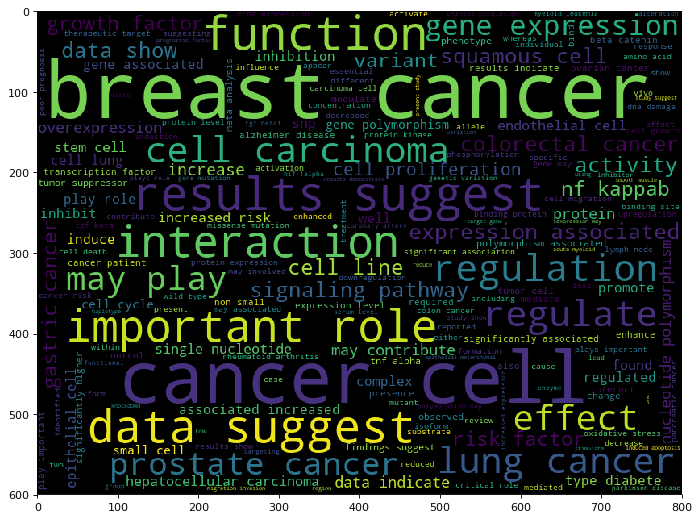

In [15]:
%matplotlib inline

plt.figure(figsize=(16, 8), dpi=80, facecolor='w', edgecolor='w')
imgplot = plt.imshow(cloud)
plt.show()

## What is studied in other organisms?
Vary the taxon ID; e.g: 3702 for Arabidopsis thaliana, 11676 for overview on HIV research, 559292 for Brewer's yeast, 7227 for Drosophila melanogaster, 6239 for Caenorhabditis elegans, ...

## Get overview of temporal trends in diseases

In [16]:
df_generif.head()

,#Tax ID,Gene ID,PubMed ID (PMID) list,last update timestamp,GeneRIF text
0,7,5692769,27190162,2017-11-18 13:38,we investigated how Azorhizobium caulinodans r...
1,24,5129993,26235439,2016-08-06 11:16,study demonstrate that polar positioning of th...
2,24,5129993,27216815,2017-06-10 12:02,"Three Cas proteins (Cas6f, Cas7fv, Cas5fv) and..."
3,24,5129993,28500045,2017-12-16 11:12,LrbS activates LrbA which further promotes the...
4,34,4126706,25803609,2016-02-20 10:11,BacM of Myxococcus xanthus forms an extended b...


In [17]:
# Make copy of the data of interest. While not formally required,
# this is good practice to avoid accidentally replacing values
# in the template table

f = df_generif.loc[:, '#Tax ID'] == 9606    # 9606 is human
df = df_generif.loc[f, ['PubMed ID (PMID) list', 'GeneRIF text']].copy()

In [18]:
# Readability is important, so let's make format clearer
df = df.rename(columns={
    'PubMed ID (PMID) list': 'pubmed_id',
    'GeneRIF text': 'GeneRIF'
}).drop_duplicates()

# ensure that pubmed is is a number (note: for some bacteria it is not)
df['pubmed_id'] = df['pubmed_id'].astype(float)   
df['GeneRIF'] = df['GeneRIF'].str.lower()

In [19]:
# use the pubmed ID as a surrogate for the time / year of publication
import numpy as np
df.loc[:, 'publication_time'] = df.loc[:, 'pubmed_id'].rank(pct=True)

# round to next highest decentile (*10, followed by ceil)
df.loc[:, 'publication_time'] = np.ceil(df.loc[:, 'publication_time']*10)

In [20]:
word_of_interest = 'cancer'

In [21]:
df.loc[:, 'has_word_of_interest'] = df.loc[:, 'GeneRIF'].str.contains(word_of_interest, regex=False)

In [22]:
import seaborn as sns

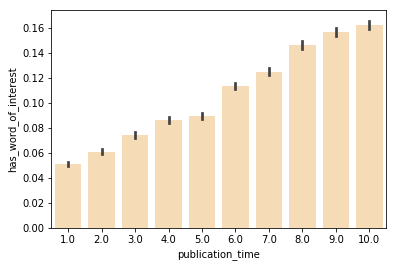

In [25]:
sns.barplot(
    x='publication_time',
    y='has_word_of_interest',
    data=df,
    color='navajowhite'
)

In [24]:
# # Assuming we wish to export this as an adobe-illustrator edit-able 
# # figure for a scientific paper, we would use

# import matplotlib as mpl
# mpl.rcParams['pdf.fonttype'] = 42      # text will be edit-able in illustrator
# mpl.rcParams['font.family'] = 'Arial'  # font type that is supported by illustrator and publishers

# sns.barplot(
#     x='publication_time',
#     y='has_word_of_interest',
#     data=df,
#     color='navajowhite'
# )

# path_to_export = os.path.join(project_path, 'word_frequency_over_time.pdf')
# plt.savefig(
#     path_to_export,
#     bbox_inches='tight')   # tight will remove extra space surrounding image

# # once opened in illustrator you may have to release the masks (see illustrator help)

## further interesting picks: 
popular words of wordcloud, e.g.: 'lung', 'important', 'may', 'interaction', 'data'

# Further suggested analysis:
- Is research on human genes and mouse genes correlated?
- Is 'cancer' appearing because many genes are associated with 'cancer', or because genes related to 'cancer' are studied more?
- ....